<a href="https://colab.research.google.com/github/dmehdipour/pytorch/blob/main/ClassificationModel_Make_Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
from torch import nn

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [28]:
n_sample = 1000
X,y = make_circles(n_sample,
                   noise=0.03,
                   random_state=42)

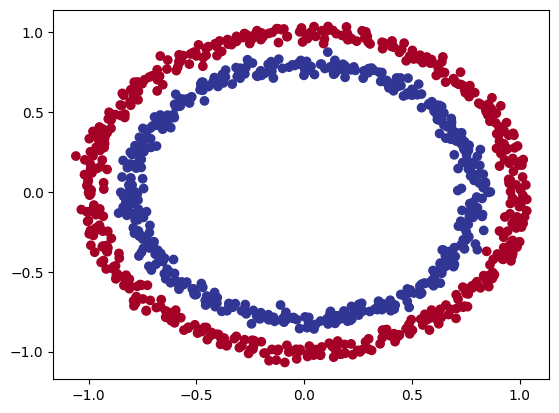

In [29]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [30]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [32]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x:torch.Tensor)->torch.Tensor:
    #return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
    out = self.layer_1(x)
    out = self.relu(out)
    out = self.layer_2(out)
    out = self.relu(out)
    out = self.layer_3(out)
    return out
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [35]:
def accuracy_fn(y_true, y_pred):
  currect = torch.eq(y_true, y_pred).sum().item()
  acc = (currect/len(y_pred))*100
  return acc

In [36]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [37]:
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

epochs = 1500

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  train_loss = loss_fn(y_logits,
                       y_train)
  train_acc = accuracy_fn(y_true=y_train,
                          y_pred=y_pred)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  if epoch%100==0:
    print(f"epoch: {epoch} | Train_loss: {train_loss:.4f}, Train_acc: {train_acc:.2f}% | Test_loss: {test_loss:.4f}, Test_acc: {test_acc:.2f}%")

epoch: 0 | Train_loss: 0.6929, Train_acc: 50.00% | Test_loss: 0.6932, Test_acc: 50.00%
epoch: 100 | Train_loss: 0.6912, Train_acc: 52.88% | Test_loss: 0.6910, Test_acc: 52.50%
epoch: 200 | Train_loss: 0.6898, Train_acc: 53.37% | Test_loss: 0.6894, Test_acc: 55.00%
epoch: 300 | Train_loss: 0.6879, Train_acc: 53.00% | Test_loss: 0.6872, Test_acc: 56.00%
epoch: 400 | Train_loss: 0.6852, Train_acc: 52.75% | Test_loss: 0.6841, Test_acc: 56.50%
epoch: 500 | Train_loss: 0.6810, Train_acc: 52.75% | Test_loss: 0.6794, Test_acc: 56.50%
epoch: 600 | Train_loss: 0.6751, Train_acc: 54.50% | Test_loss: 0.6729, Test_acc: 56.00%
epoch: 700 | Train_loss: 0.6666, Train_acc: 58.38% | Test_loss: 0.6632, Test_acc: 59.00%
epoch: 800 | Train_loss: 0.6516, Train_acc: 64.00% | Test_loss: 0.6476, Test_acc: 67.50%
epoch: 900 | Train_loss: 0.6236, Train_acc: 74.00% | Test_loss: 0.6215, Test_acc: 79.00%
epoch: 1000 | Train_loss: 0.5682, Train_acc: 87.75% | Test_loss: 0.5738, Test_acc: 86.50%
epoch: 1100 | Train_lo

In [38]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("File is already exist")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py","wb") as f:
    f.write(request.content)

File is already exist


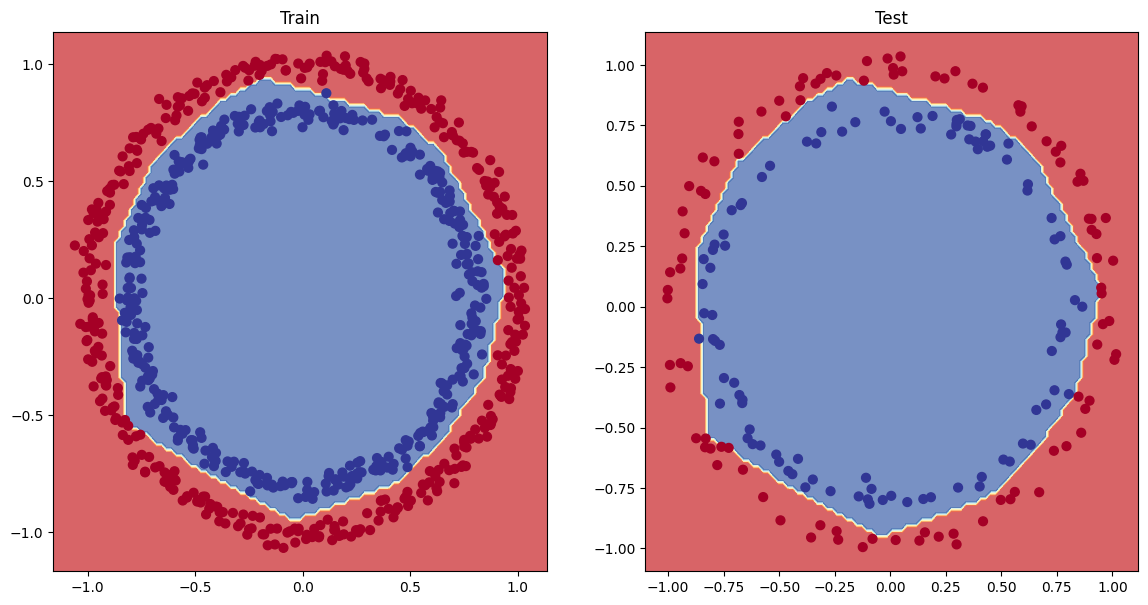

In [39]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,
                       X_train,
                       y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,
                       X_test,
                       y_test)